### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'],axis=1)

rf = RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: ', np.round(avg_rmse, 2))

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE:  4.42


In [10]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print('5 교차 검증의 평균 RMSE : {0:.4f}'.format(avg_rmse))

In [11]:
# [과제]
# cv=5, 아래 알고리즘 및 하이퍼파라미터를 적용하여 모델링 및 평가를 사용자 함수를 이용하여 수행하세요. 
# dt max_depth=4
# rf n_estimators=1000
# gb n_estimators=1000
# xgb n_estimators=1000
# lgb n_estimators=1000

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

#####  DecisionTreeRegressor  #####
5 교차 검증의 평균 RMSE : 5.9780
#####  RandomForestRegressor  #####
5 교차 검증의 평균 RMSE : 4.4225
#####  GradientBoostingRegressor  #####
5 교차 검증의 평균 RMSE : 4.2690
#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE : 4.2511
#####  LGBMRegressor  #####
5 교차 검증의 평균 RMSE : 4.6464


<AxesSubplot:>

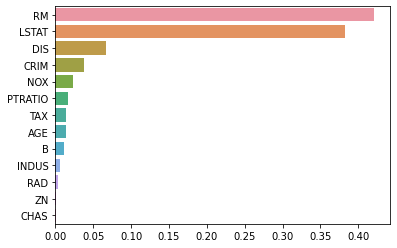

In [14]:
import seaborn as sns
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

[도전 과제]

캐글의 자전거 대여 수요 예측을 아래와 같이 수행하세요
- 데이터는 https://www.kaggle.com/c/bike-sharing-demand/data 에서 train.csv를 다운로드 받아 이용
- 선형회귀, Ridge, Lasso 모델로 예측모델 생성 
 - 문자열을 datetime 타입으로 변경
 - 종속변수 정규성 개선위한 로그 변환
 - 평가지표 : RMSLE, RMSE, MAE
- 'year', month', 'day', hour'등의 피처들을 One Hot Encoding하여 회귀모델의 예측 성능 비교
- 회귀 트리를 이용해 회귀 예측모델 및 평가(RMSLE, RMSE, MAE) 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

bike_df = pd.read_csv('dataset/bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [19]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}'.format(rmsle_val, rmse_val, \
                                                           mae_val))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,\
                                                    test_size=0.3,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

RMSLE:1.1647, RMSE:140.8996, MAE:105.9244


<AxesSubplot:xlabel='count', ylabel='Density'>

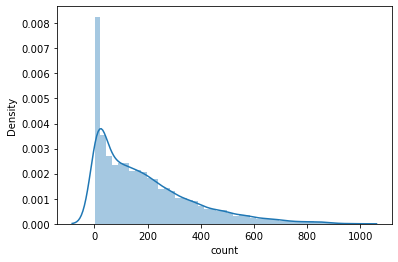

In [22]:
y_target = bike_df['count']
sns.distplot(y_target)

<AxesSubplot:xlabel='count', ylabel='Density'>

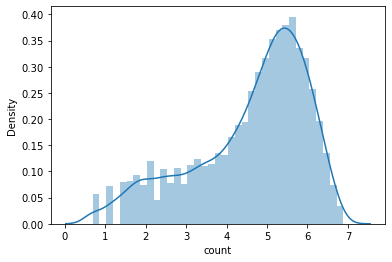

In [23]:
y_log_transform = np.log1p(y_target)
sns.distplot(y_log_transform)

In [24]:
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, \
                                                    test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp,pred_exp)

RMSLE:1.0168, RMSE:162.5943, MAE:109.2862


<AxesSubplot:>

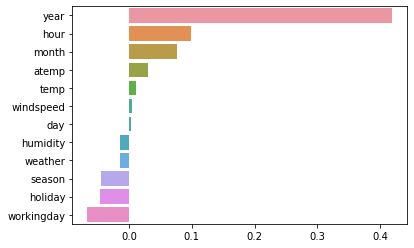

In [25]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [26]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [29]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE:0.5896, RMSE:97.6879, MAE:63.3821
### Ridge ###
RMSLE:0.5901, RMSE:98.5286, MAE:63.8934
### Lasso ###
RMSLE:0.6348, RMSE:113.2188, MAE:72.8027


<AxesSubplot:>

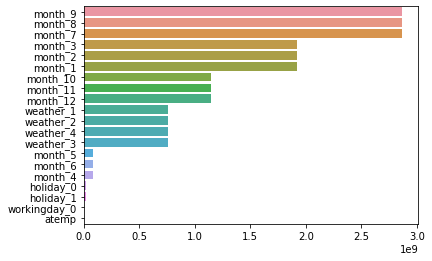

In [30]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, \
                      y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE:0.3548, RMSE:50.6188, MAE:31.2731
### GradientBoostingRegressor ###
RMSLE:0.3297, RMSE:53.3328, MAE:32.7372
### XGBRegressor ###
RMSLE:0.3422, RMSE:51.7316, MAE:31.2512
### LGBMRegressor ###
RMSLE:0.3188, RMSE:47.2146, MAE:29.0288
